<a href="https://colab.research.google.com/github/meharsg/grip/blob/main/GRIP_%3D_3_EDA_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###GRIP Task 3: Exploratory Data Analysis - Retail


**Objective**: 

>1. Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’.
2. As a business manager, try to find out the weak areas where you can
work to make more profit.
3. What all business problems you can derive by exploring the data?


In [2]:
#importing libraries
import io
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px   #for interactive graphs

In [14]:
#to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#uploading dataset
uploaded = files.upload()

In [4]:
#creating dataframe
df = pd.read_csv(io.BytesIO(uploaded['SampleSuperstore.csv']))
df.sample(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
4923,Second Class,Home Office,United States,Huntsville,Alabama,35810,South,Office Supplies,Paper,629.100,6,0.0,301.9680
1210,Second Class,Corporate,United States,New York City,New York,10009,East,Office Supplies,Binders,8.544,2,0.2,2.8836
6259,Second Class,Consumer,United States,Richmond,Indiana,47374,Central,Office Supplies,Binders,11.360,4,0.0,5.5664
9761,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Technology,Accessories,239.970,3,0.0,86.3892
1526,Standard Class,Consumer,United States,Allentown,Pennsylvania,18103,East,Office Supplies,Art,4.160,2,0.2,0.3640


**1. Exploratory Data Analysis (EDA)**

In [16]:
df.shape

(9994, 11)

In [ ]:
df.dtypes

In [15]:
df.describe(include='all')

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,531,49,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,New York City,California,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,915,2001,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


From the above information we can gather the following facts:

>1. We have no missing (null) values in any column.
2. There is only 1 country United States, so we can drop this column.
3. We have 5 numerical variables and 8 categorical variables.

In [5]:
df.drop('Country', axis=1, inplace=True)   #dropping country column

In [ ]:
df.drop('Postal Code', axis=1, inplace=True)

**Univariate Data Analysis**

>1. Ship Mode

Text(0.5, 1.0, 'Ship Mode')

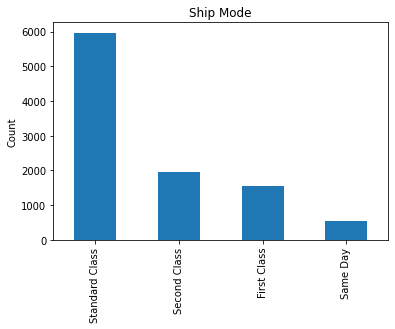

In [17]:
df['Ship Mode'].value_counts().plot.bar()
plt.ylabel('Count')
plt.title('Ship Mode')

>2. Segment

Text(0.5, 1.0, 'Segment')

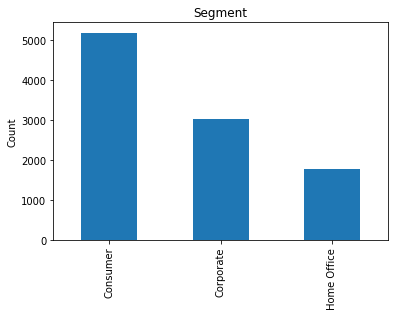

In [8]:
df['Segment'].value_counts().plot.bar()
plt.ylabel('Count')
plt.title('Segment')

>3. City

In [19]:
df.groupby(['City']).mean().sort_values(by=['Profit']).head(5)  #get mean for groupby city and then orderby Profit in ascending order

,Sales,Quantity,Discount,Profit
City,,,,
Bethlehem,337.926800,3.600000,0.380000,-200.619160
Champaign,151.960000,5.000000,0.600000,-182.352000
Oswego,107.326000,4.333333,0.600000,-178.709200
Round Rock,693.436114,3.285714,0.274286,-169.061614
Lancaster,215.031826,3.717391,0.315217,-157.371052


In [21]:
df.groupby(['City']).mean().sort_values(by=['Profit'], ascending=False).head(5)   #get mean for groupby city and then orderby Profit in descending order
#or
#df.groupby(['City']).mean().sort_values(by=['Profit']).tail(15) 

,Sales,Quantity,Discount,Profit
City,,,,
Jamestown,2354.395000,4.500000,0.0,642.885750
Independence,1208.685000,3.000000,0.0,487.831500
Lafayette,807.619355,3.354839,0.0,323.173794
Minneapolis,733.501739,3.478261,0.0,296.721070
Appleton,835.655000,6.000000,0.0,277.383150


In [ ]:
df['City'].value_counts()[:10].index.tolist()   #to get list of cities with top 10 frequency

Text(0.5, 1.0, 'City')

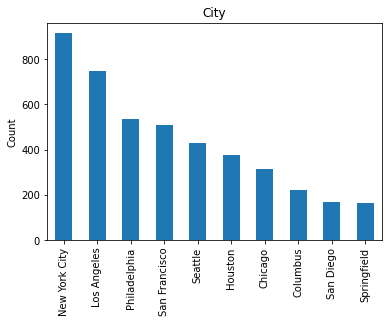

In [ ]:
df['City'].value_counts()[:10].plot.bar()   #to plot top 10 cities from where orders were placed
plt.ylabel('Count')
plt.title('City')

>4. State

Text(0.5, 1.0, 'State')

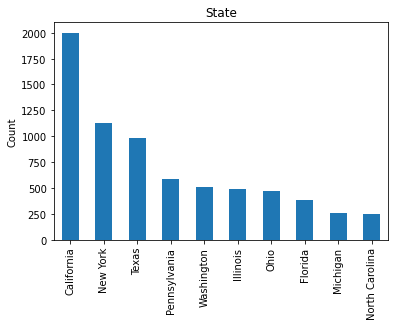

In [23]:
df['State'].value_counts()[:10].plot.bar()
plt.ylabel('Count')
plt.title('State')

>5. Region

Text(0.5, 1.0, 'Region')

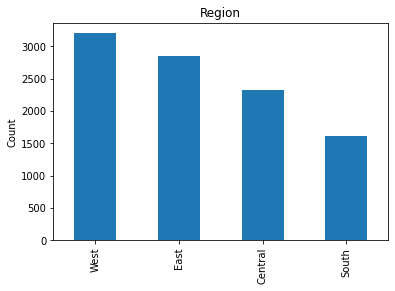

In [24]:
df['Region'].value_counts().plot.bar()
plt.ylabel('Count')
plt.title('Region')

>6. Category

In [25]:
df.groupby(['Category']).mean()

,Sales,Quantity,Discount,Profit
Category,,,,
Furniture,349.834887,3.785007,0.173923,8.699327
Office Supplies,119.324101,3.801195,0.157285,20.327050
Technology,452.709276,3.756903,0.132323,78.752002


Text(0.5, 1.0, 'Category')

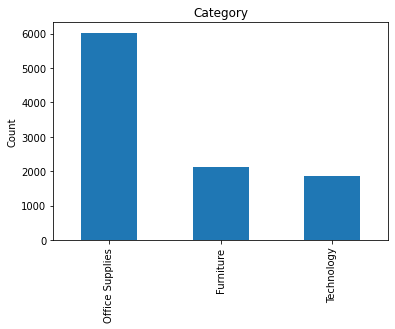

In [26]:
df['Category'].value_counts().plot.bar()
plt.ylabel('Count')
plt.title('Category')

>7. Sub-Category

In [ ]:
df.groupby(['Sub-Category']).mean()

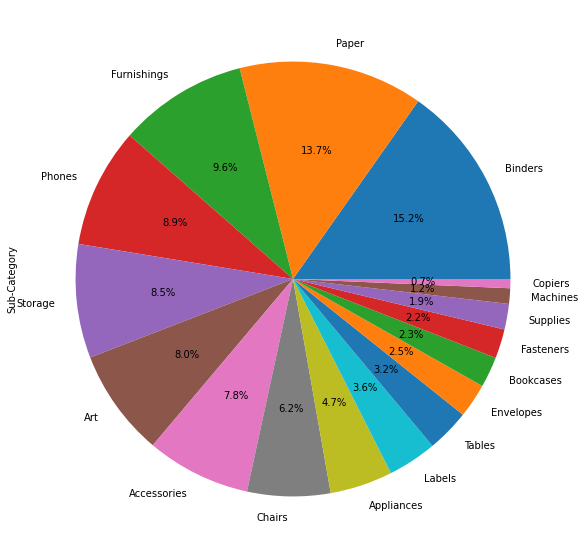

In [28]:
plt.figure(figsize=(12,10))
df['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

>8. Quantity

Text(0, 0.5, 'Density')

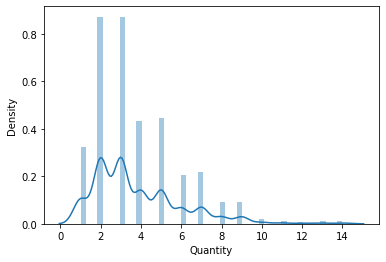

In [29]:
sns.distplot(df['Quantity'])
plt.ylabel('Density')

>9. Discount

Text(0, 0.5, 'Density')

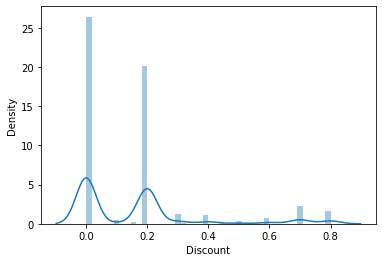

In [30]:
sns.distplot(df['Discount'])
plt.ylabel('Density')

>10. Profit

In [31]:
px.box(df, y='Profit')   #interactive boxplot

**Multivariate Data Analysis**

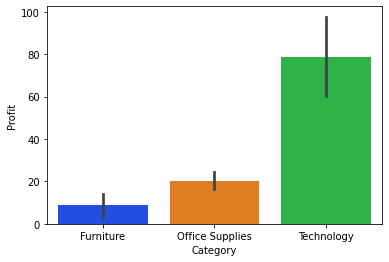

In [12]:
sns.barplot(x="Category", y="Profit", data=df, palette='bright')

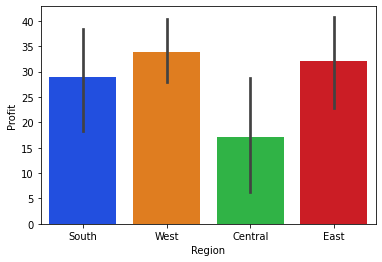

In [13]:
sns.barplot(x="Region", y="Profit", data=df, palette='bright')

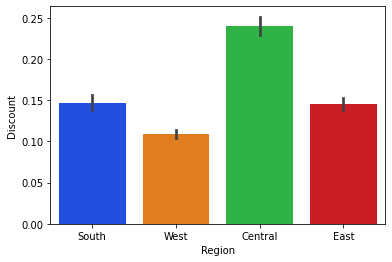

In [10]:
sns.barplot(x="Region", y="Discount", data=df, palette='bright')

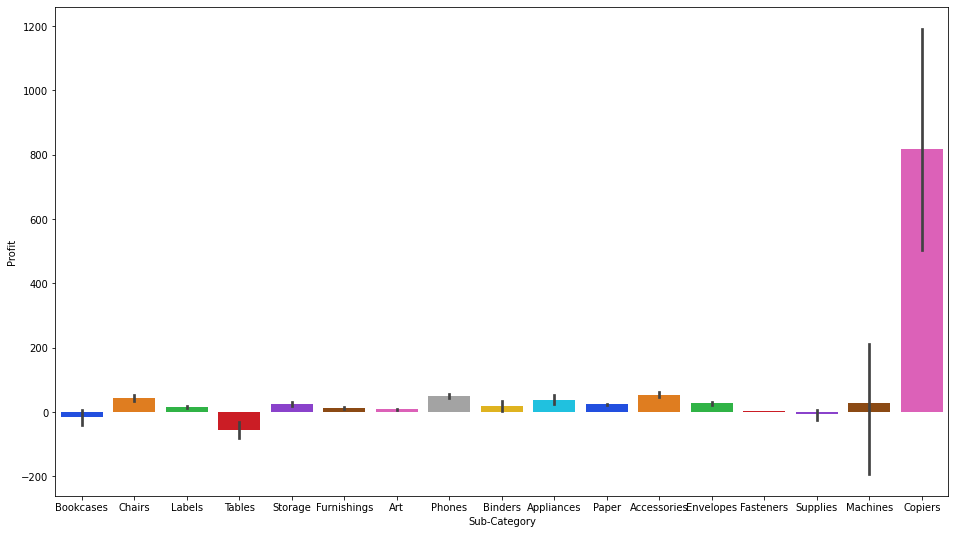

In [37]:
plt.figure(figsize=(16,9))
sns.barplot(x="Sub-Category", y="Profit", data=df, palette='bright')

Text(0.5, 1.0, 'Total Profit and Sales per Region')

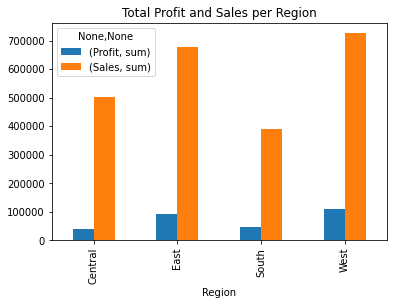

In [49]:
df.groupby('Region')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Region')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Text(0.5, 1.0, 'Total Profit and Sales per Sub-Category')

<Figure size 864x720 with 0 Axes>

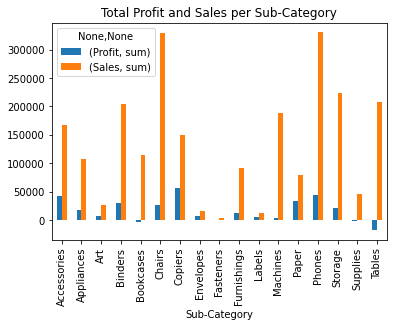

In [14]:
df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Sub-Category')

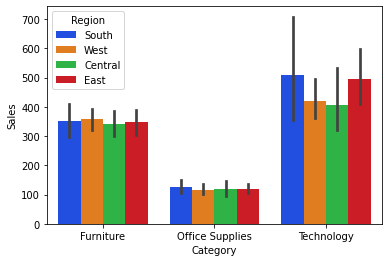

In [30]:
sns.barplot(x="Category", y="Sales", hue="Region", data=df, palette='bright')

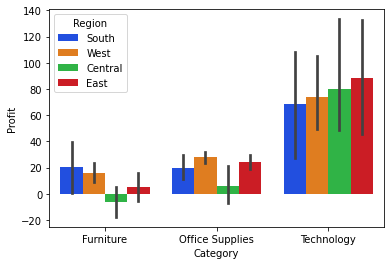

In [9]:
sns.barplot(x="Category", y="Profit", hue="Region", data=df, palette='bright')

**Analysis**:


1.   Profit is highest in Technology and lowest in Furniture category.
2.   Copier is most profitable and Table is least profitable sub-category (results in overall losses).
3.   Sales is highest in Chairs and Phones, and least in Fasteners.
4.   Highest sales in Technology is in South region.
5. West is most profitable and Centre is least profitable region.
6.  Centre region is running at a loss in Furniture and Office Supplies category and is also the region with highest discounts.



